In [1]:
#Loading relevant libraries
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn

In [2]:
#Loading raw data
raw_1 = pd.read_csv('/Users/ash/Downloads/cs156_final/chemical.csv')
raw_2 = pd.read_csv('/Users/ash/Downloads/cs156_final/diagnosis.csv')

In [3]:
print('Size:', raw_1.shape)
raw_1.head()

Size: (377, 33)


,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,309335439,H14.09.002,10235,TCx,0.000060,0.001868,0.004853,0.000211,0.003458,0.010708,...,0.02,23.44,0.946400,0.030000,0.28,55.26,0.030000,8.06,17.30,2.051156
1,309335452,H14.09.015,10208,PCx,0.000181,0.001818,0.000504,0.000172,0.000737,0.002402,...,0.34,29.14,0.477569,0.083262,0.44,7.30,3.928160,7.62,18.00,0.431825
2,467056408,H15.09.109,10294,HIP,0.003079,0.003880,0.025751,0.021730,0.001003,0.007529,...,0.00,24.38,0.151900,0.147220,3.24,0.02,3.113225,44.83,2.50,0.160250
3,326765685,H14.09.098,10557,FWM,0.000417,0.003217,0.002389,0.000627,0.002794,0.006620,...,0.30,31.82,0.184025,0.054847,0.76,10.50,5.200680,9.74,12.64,194.211638
4,309335443,H14.09.006,10235,TCx,0.000186,0.003852,0.003531,0.000385,0.002733,0.008169,...,0.00,27.42,0.564200,0.120000,0.56,10.04,0.120000,2.92,10.48,0.289575


In [4]:
print('Size:', raw_2.shape)
raw_2.head()

Size: (107, 19)


,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
1,326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
2,326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
3,467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2


In [5]:
#Function to match donor ID between the two csv files
def match_donor_id(chemical, diagnosis): 
    diag_column = diagnosis.columns
    for _ in diag_column[2:]:
        chemical[_] = np.nan
    dumb = len(diag_column) - 2
    count = 0
    for i in range(chemical.shape[0]): 
        if chemical['donor_id'].iloc[i] == diagnosis['donor_id'].iloc[count]: 
            chemical.iloc[i,-dumb:] = diagnosis.iloc[count,2:]
        elif chemical['donor_id'].iloc[i] != diagnosis['donor_id'].iloc[count]: 
            count += 1
            chemical.iloc[i,-dumb:] = diagnosis.iloc[count,2:]
        else: 
            print('Error!')
    return chemical

#First sort the files, merge sort seems to be the most stable
raw_1 = raw_1.sort_values(by=['donor_id'], kind='mergesort')
raw_2 = raw_2.sort_values(by=['donor_id'], kind='mergesort')
#Matching donor ID
data = match_donor_id(raw_1, raw_2)

In [6]:
#Dropping unrelevant variables
data = data.drop(['donor_id', 'donor_name', 'structure_id', 'age', 'act_demented'], axis=1)

In [7]:
data.isnull().sum()

structure_acronym              0
ihc_a_syn                      0
ihc_tau2_ffpe                 21
ihc_at8_ffpe                  16
ihc_at8                        0
ihc_ptdp_43_ffpe              15
ihc_a_beta_ffpe               22
ihc_a_beta                     0
ihc_iba1_ffpe                 14
ihc_gfap_ffpe                 32
ptau_ng_per_mg                45
vegf_pg_per_mg                45
ab42_over_ab40_ratio          50
tnf_a_pg_per_mg               45
il_10_pg_per_mg               45
tau_ng_per_mg                 51
isoprostane_pg_per_mg        239
il_6_pg_per_mg                45
il_1b_pg_per_mg               45
ptau_over_tau_ratio           51
il_4_pg_per_mg                45
rantes_pg_per_mg              45
ab40_pg_per_mg                45
a_syn_pg_per_mg               56
ifn_g_pg_per_mg               45
mcp_1_pg_per_mg               45
bdnf_pg_per_mg                54
mip_1a_pg_per_mg              45
il_7_pg_per_mg                45
ab42_pg_per_mg                45
sex       

In [8]:
#Separating data into brain regions for analysis (since 1 person probably only has 1 frontal cortex)
data_HIP = data.loc[data['structure_acronym'] == 'HIP']
data_HIP = data_HIP.drop(['isoprostane_pg_per_mg'], axis=1) #This variable was not recorded in this region
data_FC = data.loc[data['structure_acronym'] == 'FWM']
data_FC = data_FC.drop(['isoprostane_pg_per_mg'], axis=1) #This variable was not recorded in this region
data_PC = data.loc[data['structure_acronym'] == 'PCx']
data_TC = data.loc[data['structure_acronym'] == 'TCx']

In [9]:
#Preprocessing data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#Function to impute missing data
def imputer_float(data): 
    for _ in data.columns: 
        if data[_].dtype == object: 
            pass
        #Replacing missing numericals with medians
        elif data[_].dtype == float: 
            data[_] = data[_].replace(np.nan, data[_].median())
        else: 
            print('Error!')
#     print(data.isnull().sum())
    return data

#Function to preprocess data completely, creating a training X and a label y
def preprocessing(data):
    #Dropping categorical missing data
    data = data.dropna(axis=0)
    #Creating data labels
    encoder = LabelEncoder()
    y_1 = pd.get_dummies(data['dsm_iv_clinical_diagnosis'])
    y_1 = y_1.iloc[:,0].reset_index(drop=True)
    y_2 = data['nincds_arda_diagnosis']
    all_dumb = data['dsm_iv_clinical_diagnosis']
    data = data.drop(['dsm_iv_clinical_diagnosis', 'nincds_arda_diagnosis'], axis=1)
    
    #Scaling and OneHotEncoding data
    object_col = []
    for _ in data.columns: 
        if data[_].dtype == object:
            object_col.append(_)
            dumb = pd.get_dummies(data[_], prefix='['+_+']')
            all_dumb = pd.concat((all_dumb, dumb), axis=1)
        elif data[_].dtype == float: 
            scaler = MinMaxScaler()
            data[_] = scaler.fit_transform(np.array(data[_]).reshape(-1,1))
        else: 
            print('Error!')
    all_dumb = all_dumb.drop(['dsm_iv_clinical_diagnosis'], axis=1)
    data = data.drop(object_col, axis=1)
    X = pd.concat((data, all_dumb), axis=1)
    print('Preprocessing completed')
    return X.reset_index(drop=True), {'dsm': y_1, 'arda':y_2}

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, accuracy_score, roc_auc_score, recall_score, f1_score, log_loss

#Function to return most influence variables, from a logistic regression model
def most_influence(coefs, names, num=3): 
    coefs = np.abs(coefs)
    names = list(names)
    max_coef = []
    #Returning (default) 3 variables with largest coefficients
    for _ in range(num): 
        index = np.argmax(coefs)
        max_coef.append(names[index])
        coefs = np.delete(coefs, index)
        names.pop(index)
    return max_coef

#Visualizing results and comparisons between logistic regression and random forest
def compare_LG_RF(X_, y_): 
    #Using LogisticRegression
    print('--------------------------------------------------------------------------------------------------')
    print('Number of datapoint:', y_['dsm'].shape[0])
    logreg = LogisticRegression(penalty='l2', solver='lbfgs')
    y = y_['dsm']
    logreg.fit(X_, y)
    preds = logreg.predict(X_) 
    LG = [accuracy_score(y, preds), f1_score(y, preds), fbeta_score(y, preds, beta=2),\
         recall_score(y, preds), log_loss(y, preds)]
    #Using RandomForest, we restricted the maximum depth of the tree to decrease chance of overfitting
    forest = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=5)
    forest.fit(X_, y)
    preds = forest.predict(X_)
    RF = [accuracy_score(y, preds), f1_score(y, preds), fbeta_score(y, preds, beta=2),\
         recall_score(y, preds), log_loss(y, preds)]
    df = pd.DataFrame(np.array([LG, RF]), columns=['Accuracy', 'F1', 'F_beta', 'Recall Score', 'Cross-entropy'],\
                      index=['Logistic Regression', 'Random Forest'])
    plt.figure(figsize=(12,8))
    print('--------------------------------------------------------------------------------------------------')
    plt.bar([_ for _ in range(len(logreg.coef_[0]))],logreg.coef_[0])
    plt.title('Logisitic Regression Coefficients')
    plt.show()
    print('The best predictor:', most_influence(logreg.coef_[0],X_.columns))
    print('--------------------------------------------------------------------------------------------------')
    print(df)
    return most_influence(logreg.coef_[0],X_.columns)

Preprocessing completed
--------------------------------------------------------------------------------------------------
Number of datapoint: 87
--------------------------------------------------------------------------------------------------


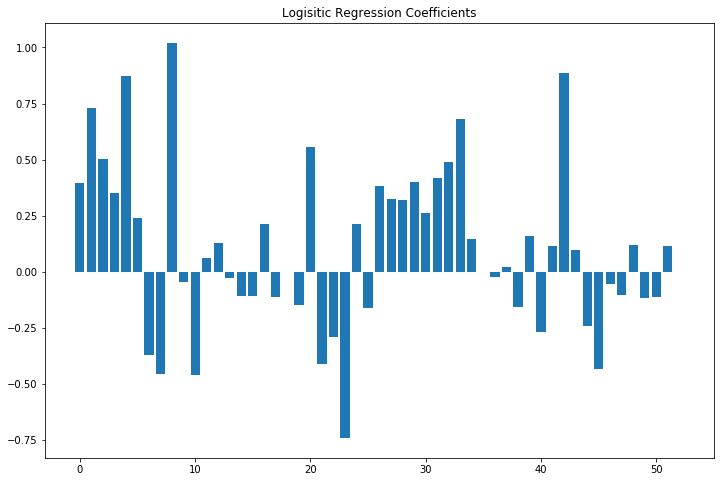

The best predictor: ['ihc_gfap_ffpe', '[longest_loc_duration]_10 sec - 1 min', 'ihc_ptdp_43_ffpe']
--------------------------------------------------------------------------------------------------
                     Accuracy        F1    F_beta  Recall Score  Cross-entropy
Logistic Regression  0.827586  0.444444  0.333333      0.285714       5.954961
Random Forest        0.988506  0.975610  0.961538      0.952381       0.396997


In [66]:
data_HIP = imputer_float(data_HIP)
X_hip, y_hip = preprocessing(data_HIP)
best_hip = compare_LG_RF(X_hip, y_hip)

/Users/ash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Preprocessing completed
--------------------------------------------------------------------------------------------------
Number of datapoint: 85
--------------------------------------------------------------------------------------------------


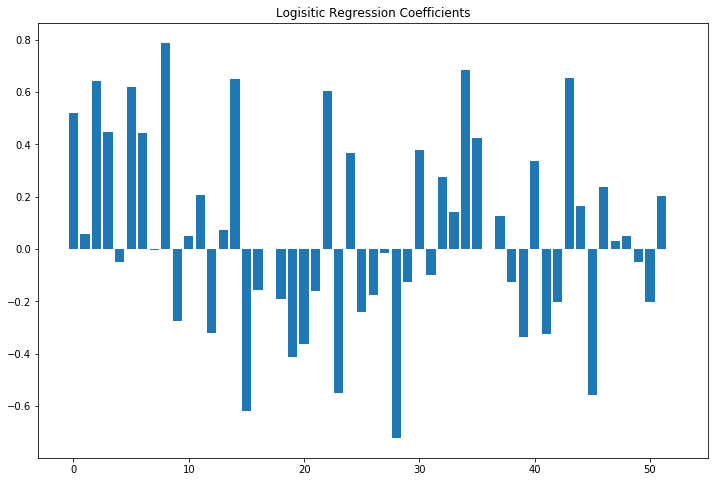

The best predictor: ['ihc_gfap_ffpe', 'ab42_pg_per_mg', 'braak']
--------------------------------------------------------------------------------------------------
                     Accuracy        F1    F_beta  Recall Score  Cross-entropy
Logistic Regression  0.800000  0.514286  0.409091          0.36       6.907765
Random Forest        0.964706  0.936170  0.901639          0.88       1.219016


In [67]:
data_PC = imputer_float(data_PC)
X_par, y_par = preprocessing(data_PC)
best_par = compare_LG_RF(X_par, y_par)

Preprocessing completed
--------------------------------------------------------------------------------------------------
Number of datapoint: 87
--------------------------------------------------------------------------------------------------


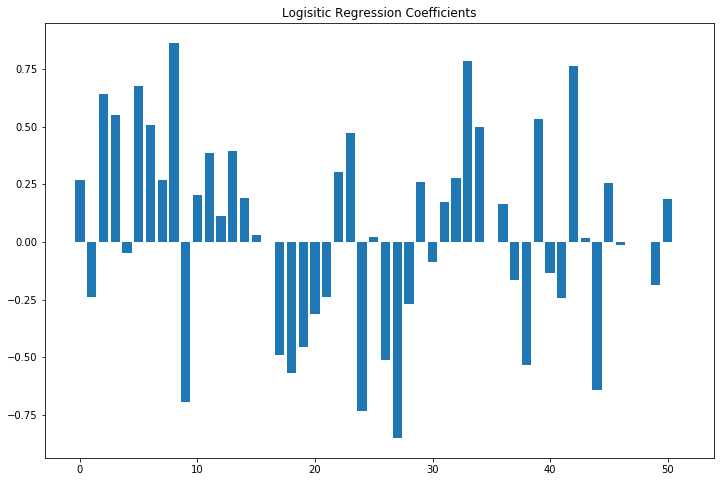

The best predictor: ['ihc_gfap_ffpe', 'ab42_pg_per_mg', 'braak']
--------------------------------------------------------------------------------------------------
                     Accuracy        F1    F_beta  Recall Score  Cross-entropy
Logistic Regression  0.827586  0.594595  0.491071          0.44       5.954971
Random Forest        0.988506  0.979592  0.967742          0.96       0.396997


In [69]:
data_FC = imputer_float(data_FC)
X_fro, y_fro = preprocessing(data_FC)
best_fro = compare_LG_RF(X_fro, y_fro)

/Users/ash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Preprocessing completed
--------------------------------------------------------------------------------------------------
Number of datapoint: 93
--------------------------------------------------------------------------------------------------


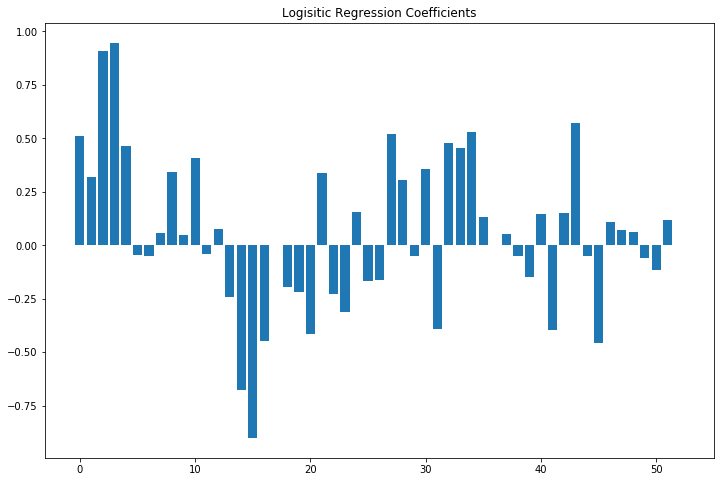

The best predictor: ['ihc_at8', 'ihc_at8_ffpe', 'isoprostane_pg_per_mg']
--------------------------------------------------------------------------------------------------
                     Accuracy        F1   F_beta  Recall Score  Cross-entropy
Logistic Regression  0.795699  0.512821  0.42735      0.384615       7.056335
Random Forest        0.946237  0.893617  0.84000      0.807692       1.856923


In [70]:
data_TC = imputer_float(data_TC)
X_tem, y_tem = preprocessing(data_TC)
best_tem = compare_LG_RF(X_tem, y_tem)

In [ ]:
#https://www.ncbi.nlm.nih.gov/pubmed/12931206
#https://www.ncbi.nlm.nih.gov/pubmed/24269023 
#Ballard, C., Gauthier, S., Corbett, A., Brayne, C., Aarsland, D., & Jones, E. (2011). Alzheimer's disease.The Lancet,377(9770), 1019-1031. doi:10.1016/s0140-6736(10)61349-9.
#Duyckaerts, C. (2011). Disentangling Alzheimer's disease.The Lancet Neurology,10(9), 774-775. doi:10.1016/s1474-4422(11)70171-5

In [71]:
#Function to encode ADRDA stage diagnosis on a numerical scale
def stage_of_AD(arda):
    stage = []
    #Changing the stage from ordinal category between 1-4 to numerical values between 0-1
    #is equivalent to scaling the output (which is strictly not neccessary, given that 
    #the coefficients are compared with each other by relative magnitude)
    for _ in range(arda.shape[0]): 
        if arda.iloc[_] == 'No Dementia': 
            stage.append(0.25)
        elif arda.iloc[_] == "Possible Alzheimer'S Disease":
            stage.append(0.50)
        elif arda.iloc[_] == "Probable Alzheimer'S Disease":
            stage.append(0.75)
        elif arda.iloc[_] == "Dementia, Type Unknown":
            stage.append(1.0)
        else: 
            print('Error!')
    return np.array(stage)

#Function to perform l2 regularized Bayesian regression on the data
def bayes_on_best(X_, y_, bests, yes_best=False): 
    from sklearn.linear_model import BayesianRidge
    y_bayes_hip = stage_of_AD(y_['arda'])
    print(y_['arda'].value_counts())
    if yes_best == True:
        X_ = X_[bests]
    bayes = BayesianRidge()
    bayes.fit(X_, y_bayes_hip)
    return bayes

In [72]:
#Function to visualize uncertainty in the Bayesian estimations of coefficients
def visualize_coef_uncertainty(model, bests): 
    #Using the diagonal values from covariance matrix of the 
    #estimated multivariate Gaussian (which stands for the coefficients)
    #we can derive the error bars for each coefficients
    errors = [np.array([model.sigma_[i,i] for i in range(len(model.coef_))]),\
              np.array([model.sigma_[i,i] for i in range(len(model.coef_))])]
    plt.figure(figsize=(12,8))
    plt.errorbar(x=range(len(model.coef_)),  y=model.coef_ ,  yerr=errors , fmt='o' ,capsize=2)
    plt.xticks(range(len(model.coef_)),bests)
    plt.ylim((-0.1,0.3))
    plt.show()

No Dementia                     48
Possible Alzheimer'S Disease    16
Probable Alzheimer'S Disease    16
Dementia, Type Unknown           7
Name: nincds_arda_diagnosis, dtype: int64


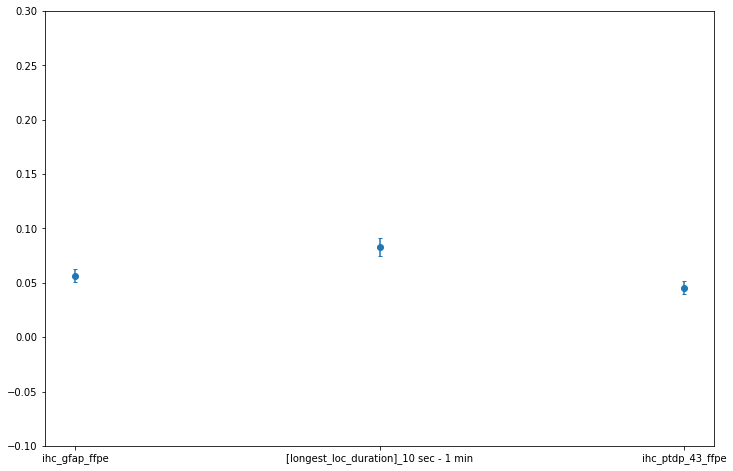

In [73]:
bayes_hip = bayes_on_best(X_hip, y_hip, best_hip, yes_best=True)
visualize_coef_uncertainty(bayes_hip, best_hip)

No Dementia                     44
Probable Alzheimer'S Disease    20
Possible Alzheimer'S Disease    14
Dementia, Type Unknown           7
Name: nincds_arda_diagnosis, dtype: int64


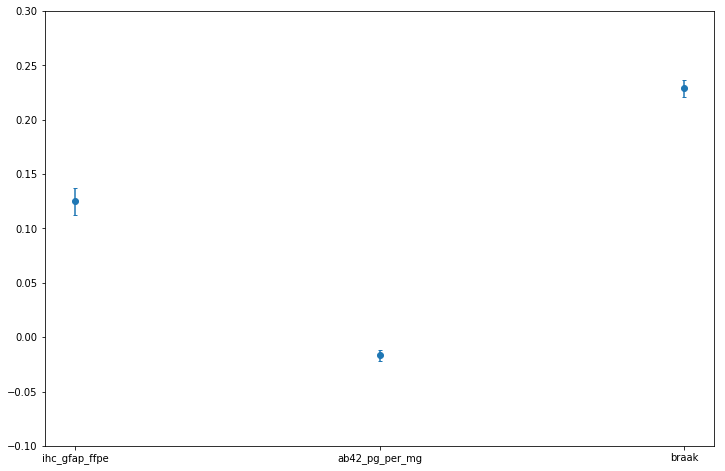

In [74]:
bayes_par = bayes_on_best(X_par, y_par, best_par, yes_best=True)
visualize_coef_uncertainty(bayes_par, best_par)

No Dementia                     45
Probable Alzheimer'S Disease    20
Possible Alzheimer'S Disease    15
Dementia, Type Unknown           7
Name: nincds_arda_diagnosis, dtype: int64


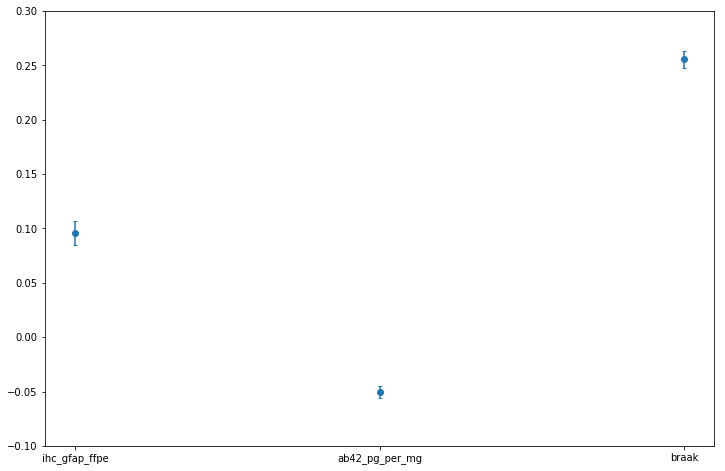

In [75]:
bayes_fro = bayes_on_best(X_fro, y_fro, best_fro, yes_best=True)
visualize_coef_uncertainty(bayes_fro, best_fro)

No Dementia                     48
Probable Alzheimer'S Disease    21
Possible Alzheimer'S Disease    17
Dementia, Type Unknown           7
Name: nincds_arda_diagnosis, dtype: int64


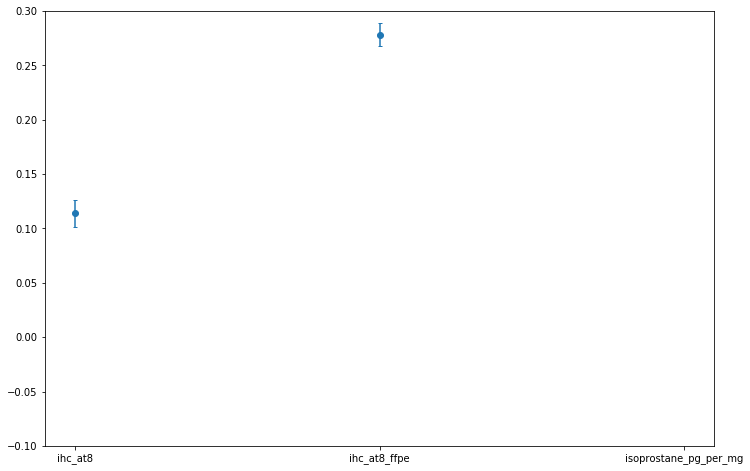

In [76]:
bayes_tem = bayes_on_best(X_tem, y_tem, best_tem, yes_best=True)
visualize_coef_uncertainty(bayes_tem, best_tem)

Base Accuracy: 1.0
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 1: 0.6
Accuracy of discriminator at step 1: 1.0
Number of training example for next step: 6
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 2: 0.4
Accuracy of discriminator at step 2: 1.0
Number of training example for next step: 4
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 3: 0.6
Accuracy of discriminator at step 3: 0.9924812030075187
Number of training example for next step: 6
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 4: 0.6
Accuracy of discriminator at step 4: 0.935251798561151
Number of training examp

/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


Accuracy of discriminator at step 5: 0.9236111111111112
Number of training example for next step: 5
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 6: 0.7
Accuracy of discriminator at step 6: 0.8079470198675497
Number of training example for next step: 7
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 7: 0.5
Accuracy of discriminator at step 7: 0.8076923076923077
Number of training example for next step: 5
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 8: 0.6
Accuracy of discriminator at step 8: 0.8148148148148148
Number of training example for next step: 6
--------------------------------------------------------------------------------------------------
Percent of fake by generato

/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


Accuracy of discriminator at step 11: 0.8285714285714286
Number of training example for next step: 5
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 12: 0.3
Accuracy of discriminator at step 12: 0.8314606741573034
Number of training example for next step: 3
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 13: 0.5
Accuracy of discriminator at step 13: 0.7377049180327869
Number of training example for next step: 5
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 14: 0.6
Accuracy of discriminator at step 14: 0.7301587301587301
Number of training example for next step: 6
--------------------------------------------------------------------------------------------------
Percent of fake by g

Accuracy of discriminator at step 55: 0.65748031496063
Number of training example for next step: 0
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 56: 0.0
Accuracy of discriminator at step 56: 0.65748031496063
Number of training example for next step: 0
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 57: 0.0
Accuracy of discriminator at step 57: 0.65748031496063
Number of training example for next step: 0
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 58: 0.0
Accuracy of discriminator at step 58: 0.65748031496063
Number of training example for next step: 0
--------------------------------------------------------------------------------------------------
Percent of fake by generator

Accuracy of discriminator at step 94: 0.6588235294117647
Number of training example for next step: 0
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 95: 0.0
Accuracy of discriminator at step 95: 0.6588235294117647
Number of training example for next step: 0
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 96: 0.0
Accuracy of discriminator at step 96: 0.6588235294117647
Number of training example for next step: 0
--------------------------------------------------------------------------------------------------
Percent of fake by generator went unnoticed at step 97: 0.0
Accuracy of discriminator at step 97: 0.6588235294117647
Number of training example for next step: 0
--------------------------------------------------------------------------------------------------
Percent of fake by g

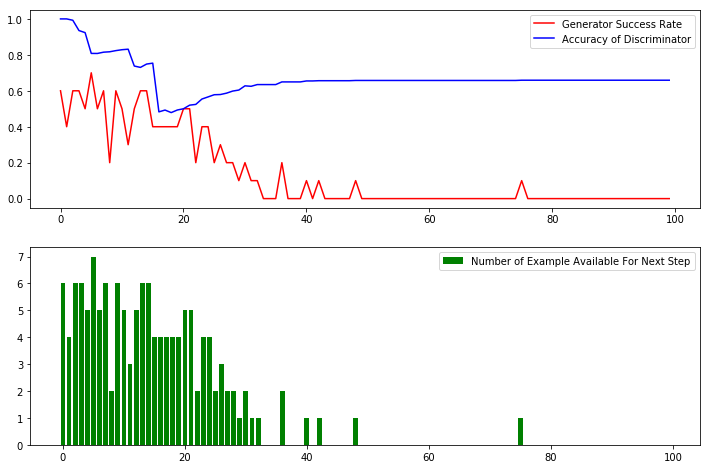

In [77]:
#Using the hippocampal data
real = X_hip.iloc[:,:30]

#1. generate fake data using completely random values 
def generate_fake_data(real, size):
    from scipy.stats import uniform
    fake = [] 
    for _ in range(real.shape[1]): 
        min_, max_ = min(real.iloc[:,_]), max(real.iloc[:,_])
        some_data = uniform(loc=min_, scale=max_).rvs(size=size)
        fake.append(some_data)
    return pd.DataFrame(np.array(fake).T, columns=real.columns)

fake = generate_fake_data(real, 30)

base_clf_X = pd.concat((fake, real), axis=0).reset_index(drop=True)
base_clf_y = np.ones(fake.shape[0]+real.shape[0])
base_clf_y[:fake.shape[0]] = 0
    
#2. train a classifier to realize fake data
clf = LogisticRegression(penalty='l2', solver='lbfgs')
clf.fit(base_clf_X, base_clf_y)
preds = clf.predict(base_clf_X)
print('Base Accuracy:', accuracy_score(base_clf_y, preds))

#3. include 10 real data to kernel model/Gaussian Mixtures --> generate 100 fake data 

def generator_density(train, size=10): 
    from sklearn.neighbors import KernelDensity
    dense = KernelDensity(bandwidth=100, kernel='gaussian')
    dense.fit(train)
    samples = dense.sample(size)
    return pd.DataFrame(samples, columns=train.columns)

fake_dense = generator_density(real.iloc[:10,:])

#4. Use trained classifier in 2. to learn which one can be "real" --> put the "real" one to 3. and repeat
#5. re-parse "real" one to fake --> train classifier again
def adversarial(real, fake, base_clf_X, base_clf_y, base_clf, generator, step=100): 
    gen, dis, exam = [], [], []
    for ash in range(step):
        print('--------------------------------------------------------------------------------------------------')
        real = real.iloc[:10,:]
        preds = base_clf.predict(fake)
#         print('Accuracy of discriminator at step {}:'.format(ash+1), accuracy_score(np.zeros(fake.shape[0]),preds))
        index_1 = [preds[_] == 1 for _ in range(preds.shape[0])]
        print('Percent of fake by generator went unnoticed at step {}:'.format(ash+1), sum(index_1)/len(index_1))
        gen.append(sum(index_1)/len(index_1))
        dumb = fake[index_1]
        train_generator = pd.concat((real, dumb), axis=0)
        train_discriminator_X = pd.concat((base_clf_X, dumb), axis=0)
        train_discriminator_y = np.zeros(train_discriminator_X.shape[0])
        train_discriminator_y[:base_clf_y.shape[0]] = base_clf_y
        fake = generator(train_generator)
        base_clf.fit(train_discriminator_X, train_discriminator_y)
        preds = base_clf.predict(train_discriminator_X)
        print('Accuracy of discriminator at step {}:'.format(ash+1), accuracy_score(train_discriminator_y,preds))
        dis.append(accuracy_score(train_discriminator_y,preds))
        print('Number of training example for next step:', dumb.shape[0])
        exam.append(dumb.shape[0])
        base_clf_X = train_discriminator_X
        base_clf_y = train_discriminator_y
    return gen, dis, exam
    
gen, dis, exam = adversarial(real, fake_dense, base_clf_X, base_clf_y, clf, generator_density)
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(range(len(gen)), gen, color='r', label='Generator Success Rate')
plt.plot(range(len(gen)), dis, color='b', label='Accuracy of Discriminator')
plt.legend()
plt.subplot(2,1,2)
plt.bar(range(len(gen)), exam, color='g', label='Number of Example Available For Next Step')
plt.legend()
plt.show()